# Extraccion de caracteríticas de los posters

## Tecnicas que se utilizaron:
- HSV
- SIFT
- HOG
- LBP

Cargamos nuestro df

In [1]:
import pandas as pd
import cv2
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('movies_train_with_posters.csv')

In [3]:
movies.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,poster_path
0,619,Ed (1996),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Posterss/Ed (1996).jpg
1,33826,Saint Ralph (2004),Comedy|Drama,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Posterss/Saint Ralph (2004).jpg
2,140289,Men & Chicken (2015),Comedy|Drama,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Posterss/Men & Chicken (2015).jpg
3,2868,Fright Night Part II (1988),Horror,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Posterss/Fright Night Part II (1988).jpg
4,27826,Touch of Pink (2004),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,Posterss/Touch of Pink (2004).jpg


# Histogramas HSV

In [11]:
# Crear lista para almacenar histogramas
hsv_features = []

for _, row in tqdm(movies.iterrows(), total=len(movies)):
    img_path = row['poster_path']

    # Verificar si la imagen existe
    if not os.path.exists(img_path):
        continue

    # Leer la imagen
    img = cv2.imread(img_path)

    if img is None:
        # Imagen corrupta o ilegible
        continue

    # Convertir a espacio de color HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Calcular histogramas separados para cada canal
    hist_h = cv2.calcHist([hsv], [0], None, [50], [0, 180])
    hist_s = cv2.calcHist([hsv], [1], None, [60], [0, 256])
    hist_v = cv2.calcHist([hsv], [2], None, [60], [0, 256])

    # Normalizar los histogramas
    hist_h = cv2.normalize(hist_h, hist_h).flatten()
    hist_s = cv2.normalize(hist_s, hist_s).flatten()
    hist_v = cv2.normalize(hist_v, hist_v).flatten()

    # Concatenar H, S, V en un solo vector
    hist_concat = np.concatenate([hist_h, hist_s, hist_v])

    # Guardar el vector junto con movieId
    hsv_features.append({
        'movieId': row['movieId'],
        'title': row['title'],
        'hsv_histogram': hist_concat.tolist()
    })

# Convertir a DataFrame
hsv_df = pd.DataFrame(hsv_features)

# Guardar los histogramas en un CSV
hsv_df.to_csv("movies_hsv_histograms.csv", index=False)

print(f"\n✅ Histogramas HSV generados para {len(hsv_df)} posters.")

100%|██████████| 5986/5986 [00:25<00:00, 238.27it/s]



✅ Histogramas HSV generados para 5831 posters.


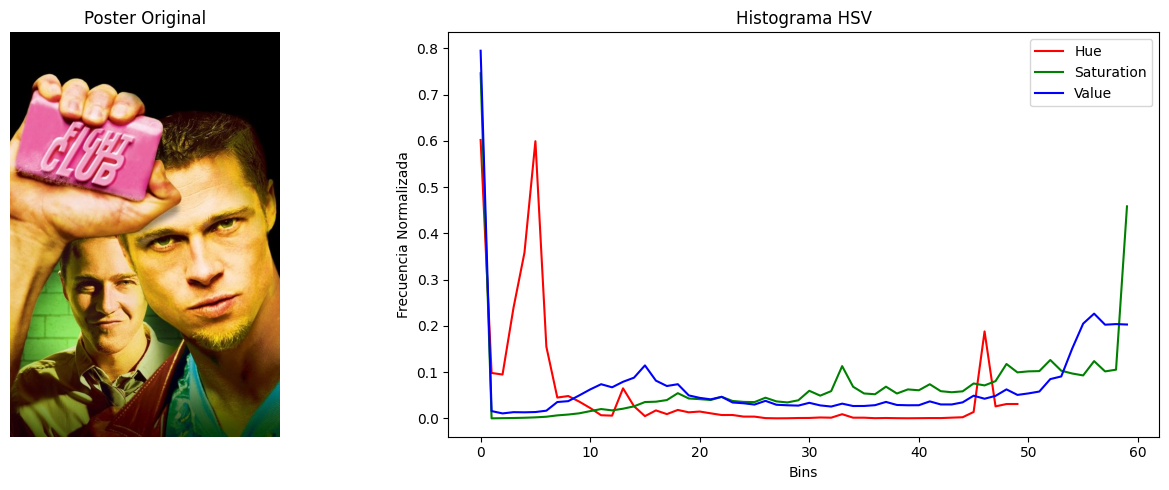

In [12]:
# Ruta de la imagen que quieres analizar
img_path = "Posterss/Fight Club (1999).jpg"  

# Leer la imagen
img = cv2.imread(img_path)

# Validar lectura
if img is None:
    raise ValueError(f"No se pudo leer la imagen: {img_path}")

# Convertir a HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Calcular histogramas para cada canal
hist_h = cv2.calcHist([hsv], [0], None, [50], [0, 180])
hist_s = cv2.calcHist([hsv], [1], None, [60], [0, 256])
hist_v = cv2.calcHist([hsv], [2], None, [60], [0, 256])

# Normalizar (opcional, mejora visualización)
hist_h = cv2.normalize(hist_h, hist_h).flatten()
hist_s = cv2.normalize(hist_s, hist_s).flatten()
hist_v = cv2.normalize(hist_v, hist_v).flatten()

# Graficar
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Poster Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.plot(hist_h, color='r', label='Hue')
plt.plot(hist_s, color='g', label='Saturation')
plt.plot(hist_v, color='b', label='Value')
plt.title("Histograma HSV")
plt.xlabel("Bins")
plt.ylabel("Frecuencia Normalizada")
plt.legend()

plt.tight_layout()
plt.show()

# SIFT

prueba prueba